# PREDICTING SURVIVAL ON TITANIC 

##### The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

Dataset: https://www.kaggle.com/c/titanic/data

1. Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
2. Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. Name - Name
4. Sex - Sex
5. Age - Age
6. Sibsp - Number of Siblings/Spouses Aboard
7. Parch - Number of Parents/Children Aboard
8. Ticket - Ticket Number
9. Fare - Passenger Fare
10. Cabin - Cabin
11. Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head(-5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


In [5]:
print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
selected_columns = [ 'Survived','Age', 'Pclass', 'Sex', 'Fare', 'SibSp', 'Parch','Embarked']
data_selected = train_data[selected_columns]

In [9]:
data_numeric = pd.get_dummies(train_data[selected_columns])

corrmat = data_numeric.corr()
corrmat

,Survived,Age,Pclass,Fare,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.077221,-0.338481,0.257307,-0.035322,0.081629,0.543351,-0.543351,0.168240,0.003650,-0.155660
Age,-0.077221,1.000000,-0.369226,0.096067,-0.308247,-0.189119,-0.093254,0.093254,0.036261,-0.022405,-0.032523
Pclass,-0.338481,-0.369226,1.000000,-0.549500,0.083081,0.018443,-0.131900,0.131900,-0.243292,0.221009,0.081720
Fare,0.257307,0.096067,-0.549500,1.000000,0.159651,0.216225,0.182333,-0.182333,0.269335,-0.117216,-0.166603
SibSp,-0.035322,-0.308247,0.083081,0.159651,1.000000,0.414838,0.114631,-0.114631,-0.059528,-0.026354,0.070941
Parch,0.081629,-0.189119,0.018443,0.216225,0.414838,1.000000,0.245489,-0.245489,-0.011069,-0.081228,0.063036
Sex_female,0.543351,-0.093254,-0.131900,0.182333,0.114631,0.245489,1.000000,-1.000000,0.082853,0.074115,-0.125722
Sex_male,-0.543351,0.093254,0.131900,-0.182333,-0.114631,-0.245489,-1.000000,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,0.168240,0.036261,-0.243292,0.269335,-0.059528,-0.011069,0.082853,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,-0.022405,0.221009,-0.117216,-0.026354,-0.081228,0.074115,-0.074115,-0.148258,1.000000,-0.496624


In [10]:
plt.rcParams['figure.figsize'] = [6, 3]
plt.rcParams['figure.dpi'] = 80

In [11]:
colors = ["#d73027", "#ffffbf", "#1a9850"]  # Red, Yellow, Green
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

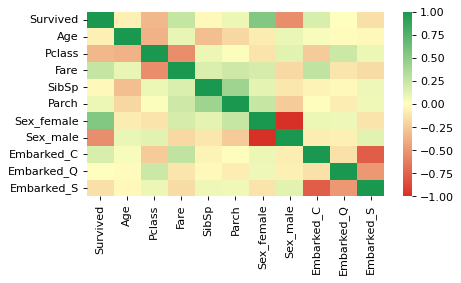

In [12]:
sns.heatmap(corrmat, cmap=cmap)
plt.show()

<Axes: ylabel='count'>

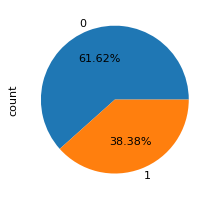

In [13]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

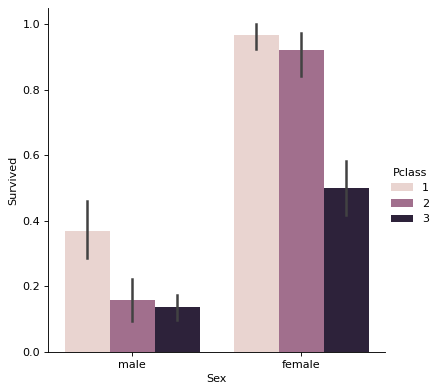

In [14]:
sns.catplot(x = 'Sex', y = 'Survived', kind = 'bar', data = train_data, hue = 'Pclass')

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [16]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [17]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [18]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify titles
title_mapping = {
    "Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Rare", 
    "Rev": "Rare", "Col": "Rare", "Major": "Rare", "Mlle": "Miss", "Mme": "Mrs", 
    "Countess": "Rare", "Ms": "Miss", "Lady": "Rare", "Jonkheer": "Rare", 
    "Don": "Rare", "Dona": "Rare", "Sir": "Rare", "Capt": "Rare"
}
train_data['Title'] = train_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].map(title_mapping)

train_data['Title'] = train_data['Title'].fillna('Rare')
test_data['Title'] = test_data['Title'].fillna('Rare')

In [19]:
train_data['CabinSection'] = train_data['Cabin'].str[0]
test_data['CabinSection'] = test_data['Cabin'].str[0]

train_data['CabinSection'] = train_data['CabinSection'].fillna('Unknown')
test_data['CabinSection'] = test_data['CabinSection'].fillna('Unknown')

In [28]:
features = ["Pclass", "Sex", "Age", "Embarked", "FamilySize", "Title", "CabinSection"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [29]:
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

y = train_data["Survived"]

In [30]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)


In [33]:
model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=1)

In [34]:
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       106
           1       0.84      0.70      0.76        73

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [25]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

Cross-validation scores: [0.84916201 0.82022472 0.8258427  0.79775281 0.85955056]
Average CV score: 0.8305065595380077


In [35]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
import pickle

with open('titanic_model.pkl', 'wb') as file:
    pickle.dump(model, file)